In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [2]:
df = pd.read_csv('teleco_market_basket.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  5747 non-null   object
 2   Item03  4389 non-null   object
 3   Item04  3345 non-null   object
 4   Item05  2529 non-null   object
 5   Item06  1864 non-null   object
 6   Item07  1369 non-null   object
 7   Item08  981 non-null    object
 8   Item09  654 non-null    object
 9   Item10  395 non-null    object
 10  Item11  256 non-null    object
 11  Item12  154 non-null    object
 12  Item13  87 non-null     object
 13  Item14  47 non-null     object
 14  Item15  25 non-null     object
 15  Item16  8 non-null      object
 16  Item17  4 non-null      object
 17  Item18  4 non-null      object
 18  Item19  3 non-null      object
 19  Item20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [4]:
df.head(10)

Item01  \
0                                        NaN   
1               Logitech M510 Wireless mouse   
2                                        NaN   
3      Apple Lightning to Digital AV Adapter   
4                                        NaN   
5  UNEN Mfi Certified 5-pack Lightning Cable   
6                                        NaN   
7                        Cat8 Ethernet Cable   
8                                        NaN   
9             Dust-Off Compressed Gas 2 pack   

                             Item02                      Item03  \
0                               NaN                         NaN   
1                         HP 63 Ink                   HP 65 ink   
2                               NaN                         NaN   
3  TP-Link AC1750 Smart WiFi Router                Apple Pencil   
4                               NaN                         NaN   
5                               NaN                         NaN   
6                               NaN                         NaN   
7                         HP 65 ink                         NaN   
8                               NaN                         NaN   
9     Screen Mom Screen Cleaner kit  Moread HDMI to VGA Adapter   

                       Item04                     Item05        Item06  \
0                         NaN                        NaN           NaN   
1  nonda USB C to USB Adapter  10ft iPHone Charger Cable  HP 902XL ink   
2                         NaN                        NaN           NaN   
3                         NaN                        NaN           NaN   
4                         NaN                        NaN           NaN   
5                         NaN                        NaN           NaN   
6                         NaN                        NaN           NaN   
7                         NaN                        NaN           NaN   
8                         NaN                        NaN           NaN   
9       HP 62XL Tri-Color ink  Apple USB-C Charger cable           NaN   

                         Item07                               Item08  \
0                           NaN                                  NaN   
1  Creative Pebble 2.0 Speakers  Cleaning Gel Universal Dust Cleaner   
2                           NaN                                  NaN   
3                           NaN                                  NaN   
4                           NaN                                  NaN   
5                           NaN                                  NaN   
6                           NaN                                  NaN   
7                           NaN                                  NaN   
8                           NaN                                  NaN   
9                           NaN                                  NaN   

                          Item09                                   Item10  \
0                            NaN                                      NaN   
1  Micro Center 32GB Memory card  YUNSONG 3pack 6ft Nylon Lightning Cable   
2                            NaN                                      NaN   
3                            NaN                                      NaN   
4                            NaN                                      NaN   
5                            NaN                                      NaN   
6                            NaN                                      NaN   
7                            NaN                                      NaN   
8                            NaN                                      NaN   
9                            NaN                                      NaN   

                         Item11                     Item12  \
0                           NaN                        NaN   
1  TopMate C5 Laptop Cooler pad  Apple USB-C Charger cable   
2                           NaN                        NaN   
3                           NaN                        NaN   
4    

In [5]:
df.isnull().sum()

Item01     7501
Item02     9255
Item03    10613
Item04    11657
Item05    12473
Item06    13138
Item07    13633
Item08    14021
Item09    14348
Item10    14607
Item11    14746
Item12    14848
Item13    14915
Item14    14955
Item15    14977
Item16    14994
Item17    14998
Item18    14998
Item19    14999
Item20    15001
dtype: int64

In [6]:
df.duplicated()

0        False
1        False
2         True
3        False
4         True
         ...  
14997     True
14998     True
14999     True
15000     True
15001    False
Length: 15002, dtype: bool

In [7]:
customer_transaction = df.iloc[0]

In [8]:
print(customer_transaction)

Item01    NaN
Item02    NaN
Item03    NaN
Item04    NaN
Item05    NaN
Item06    NaN
Item07    NaN
Item08    NaN
Item09    NaN
Item10    NaN
Item11    NaN
Item12    NaN
Item13    NaN
Item14    NaN
Item15    NaN
Item16    NaN
Item17    NaN
Item18    NaN
Item19    NaN
Item20    NaN
Name: 0, dtype: object


In [9]:
customer_transaction = df.iloc[1]

In [10]:
print(customer_transaction)

Item01               Logitech M510 Wireless mouse
Item02                                  HP 63 Ink
Item03                                  HP 65 ink
Item04                 nonda USB C to USB Adapter
Item05                  10ft iPHone Charger Cable
Item06                               HP 902XL ink
Item07               Creative Pebble 2.0 Speakers
Item08        Cleaning Gel Universal Dust Cleaner
Item09              Micro Center 32GB Memory card
Item10    YUNSONG 3pack 6ft Nylon Lightning Cable
Item11               TopMate C5 Laptop Cooler pad
Item12                  Apple USB-C Charger cable
Item13               HyperX Cloud Stinger Headset
Item14                TONOR USB Gaming Microphone
Item15             Dust-Off Compressed Gas 2 pack
Item16             3A USB Type C Cable 3 pack 6FT
Item17                      HOVAMP iPhone charger
Item18                   SanDisk Ultra 128GB card
Item19       FEEL2NICE 5 pack 10ft Lighning cable
Item20        FEIYOLD Blue light Blocking Glasses


In [11]:
df_cleaned = df.iloc[1::2]  # Keep rows from index 1 and take every second row


In [12]:
print(f'Original shape: {df.shape}')
print(f'Cleaned shape: {df_cleaned.shape}')

Original shape: (15002, 20)
Cleaned shape: (7501, 20)


In [13]:
df_cleaned.head(5)

Item01  \
1               Logitech M510 Wireless mouse   
3      Apple Lightning to Digital AV Adapter   
5  UNEN Mfi Certified 5-pack Lightning Cable   
7                        Cat8 Ethernet Cable   
9             Dust-Off Compressed Gas 2 pack   

                             Item02                      Item03  \
1                         HP 63 Ink                   HP 65 ink   
3  TP-Link AC1750 Smart WiFi Router                Apple Pencil   
5                               NaN                         NaN   
7                         HP 65 ink                         NaN   
9     Screen Mom Screen Cleaner kit  Moread HDMI to VGA Adapter   

                       Item04                     Item05        Item06  \
1  nonda USB C to USB Adapter  10ft iPHone Charger Cable  HP 902XL ink   
3                         NaN                        NaN           NaN   
5                         NaN                        NaN           NaN   
7                         NaN                        NaN           NaN   
9       HP 62XL Tri-Color ink  Apple USB-C Charger cable           NaN   

                         Item07                               Item08  \
1  Creative Pebble 2.0 Speakers  Cleaning Gel Universal Dust Cleaner   
3                           NaN                                  NaN   
5                           NaN                                  NaN   
7                           NaN                                  NaN   
9                           NaN                                  NaN   

                          Item09                                   Item10  \
1  Micro Center 32GB Memory card  YUNSONG 3pack 6ft Nylon Lightning Cable   
3                            NaN                                      NaN   
5                            NaN                                      NaN   
7                            NaN                                      NaN   
9                            NaN                                      NaN   

                         Item11                     Item12  \
1  TopMate C5 Laptop Cooler pad  Apple USB-C Charger cable   
3                           NaN                        NaN   
5                           NaN                        NaN   
7                           NaN                        NaN   
9                           NaN                        NaN   

                         Item13                       Item14  \
1  HyperX Cloud Stinger Headset  TONOR USB Gaming Microphone   
3                           NaN                          NaN   
5                           NaN                          NaN   
7                           NaN                          NaN   
9                           NaN                          NaN   

                           Item15                          Item16  \
1  Dust-Off Compressed Gas 2 pack  3A USB Type C Cable 3 pack 6FT   
3                             NaN                             NaN   
5                             NaN                             NaN   
7                             NaN                             NaN   
9                             NaN                             NaN   

                  Item17                    Item18  \
1  HOVAMP iPhone charger  SanDisk Ultra 128GB card   
3                    NaN                       NaN   
5                    NaN                       NaN   
7                    NaN                       NaN   
9                    NaN                       NaN   

                                 Item19                               Item20  
1  FEEL2NICE 5 pack 10ft Lighning cable  FEIYOLD Blue light Blocking Glasses  
3                                   NaN                                  NaN  
5                                   NaN                                  NaN  
7                                   NaN                                  NaN  
9                                   NaN                                  NaN

In [14]:
rows = []
for i in range(0,7501):
   rows.append([str(df_cleaned.values[i,j])
for j in range (0,20)])

In [15]:
DE = TransactionEncoder()
array = DE.fit(rows).transform(rows)

In [16]:
binary_df = pd.DataFrame(array, columns=DE.columns_)

In [17]:
binary_df.head(7505)

10ft iPHone Charger Cable  10ft iPHone Charger Cable 2 Pack  \
0                          True                             False   
1                         False                             False   
2                         False                             False   
3                         False                             False   
4                         False                             False   
...                         ...                               ...   
7496                      False                             False   
7497                      False                             False   
7498                      False                             False   
7499                      False                             False   
7500                      False                             False   

      3 pack Nylon Braided Lightning Cable  3A USB Type C Cable 3 pack 6FT  \
0                                    False                            True   
1                                    False                           False   
2                                    False                           False   
3                                    False                           False   
4                                    False                           False   
...                                    ...                             ...   
7496                                 False                           False   
7497                                 False                           False   
7498                                 False                           False   
7499                                 False                           False   
7500                                 False                           False   

      5pack Nylon Braided USB C cables  ARRIS SURFboard SB8200 Cable Modem  \
0                                False                               False   
1                                False                               False   
2                                False                               False   
3                                False                               False   
4                                False                               False   
...                                ...                                 ...   
7496                             False                               False   
7497                             False                                True   
7498                             False                               False   
7499                             False                               False   
7500                             False                               False   

      Anker 2-in-1 USB Card Reader  Anker 4-port USB hub  \
0                            False                 False   
1                            False                 False   
2                            False                 False   
3                            False                 False   
4                            False                 False   
...                            ...                   ...   
7496                         False                 False   
7497                         False                 False   
7498                         False                 False   
7499                         False                 False   
7500                         False                 False   

      Anker USB C to HDMI Adapter  Apple Lightning to Digital AV Adapter  ...  \
0                           False                                  False  ...   
1                           False                                   True  ...   
2                           False                                  False  ...   
3                           False                                  False  ...   
4                           False                                  False  ...   
...                           ...                                    ...  ...   
7496           

In [18]:
for col in binary_df.columns: 
      print(col) 

10ft iPHone Charger Cable
10ft iPHone Charger Cable 2 Pack
3 pack Nylon Braided Lightning Cable
3A USB Type C Cable 3 pack 6FT
5pack Nylon Braided USB C cables
ARRIS SURFboard SB8200 Cable Modem
Anker 2-in-1 USB Card Reader
Anker 4-port USB hub
Anker USB C to HDMI Adapter
Apple Lightning to Digital AV Adapter
Apple Lightning to USB cable
Apple Magic Mouse 2
Apple Pencil
Apple Pencil 2nd Gen
Apple Power Adapter Extension Cable
Apple USB-C Charger cable
AutoFocus 1080p Webcam
BENGOO G90000 headset
Blue Light Blocking Glasses
Blue Light Blocking Glasses 2pack
Brother Genuine High Yield Toner Cartridge
Cat 6 Ethernet Cable 50ft
Cat8 Ethernet Cable
CicTsing MM057 2.4G Wireless Mouse
Cleaning Gel Universal Dust Cleaner
Creative Pebble 2.0 Speakers
DisplayPort ot HDMI adapter
Dust-Off Compressed Gas
Dust-Off Compressed Gas 2 pack
FEEL2NICE 5 pack 10ft Lighning cable
FEIYOLD Blue light Blocking Glasses
Falcon Dust Off Compressed Gas
HOVAMP Mfi 6pack Lightning Cable
HOVAMP iPhone charger
HP 61 

# Let's Get Rid of the Column 'nan'

In [19]:
# Dropping the column named 'nan'
cleaned_df = binary_df.drop(['nan'], axis=1)


# We have succefully dropped one column that was labeled as 'nan'

If we look below we can see that it goes from 7501 row and 120 columns to 119 columns so this is a success. 

In [20]:
cleaned_df.head(7505)

10ft iPHone Charger Cable  10ft iPHone Charger Cable 2 Pack  \
0                          True                             False   
1                         False                             False   
2                         False                             False   
3                         False                             False   
4                         False                             False   
...                         ...                               ...   
7496                      False                             False   
7497                      False                             False   
7498                      False                             False   
7499                      False                             False   
7500                      False                             False   

      3 pack Nylon Braided Lightning Cable  3A USB Type C Cable 3 pack 6FT  \
0                                    False                            True   
1                                    False                           False   
2                                    False                           False   
3                                    False                           False   
4                                    False                           False   
...                                    ...                             ...   
7496                                 False                           False   
7497                                 False                           False   
7498                                 False                           False   
7499                                 False                           False   
7500                                 False                           False   

      5pack Nylon Braided USB C cables  ARRIS SURFboard SB8200 Cable Modem  \
0                                False                               False   
1                                False                               False   
2                                False                               False   
3                                False                               False   
4                                False                               False   
...                                ...                                 ...   
7496                             False                               False   
7497                             False                                True   
7498                             False                               False   
7499                             False                               False   
7500                             False                               False   

      Anker 2-in-1 USB Card Reader  Anker 4-port USB hub  \
0                            False                 False   
1                            False                 False   
2                            False                 False   
3                            False                 False   
4                            False                 False   
...                            ...                   ...   
7496                         False                 False   
7497                         False                 False   
7498                         False                 False   
7499                         False                 False   
7500                         False                 False   

      Anker USB C to HDMI Adapter  Apple Lightning to Digital AV Adapter  ...  \
0                           False                                  False  ...   
1                           False                                   True  ...   
2                           False                                  False  ...   
3                           False                                  False  ...   
4                           False                                  False  ...   
...                           ...                                    ...  ...   
7496           

In [21]:
cleaned_df.to_csv('df_cleanmba1.csv',index=False)
cleaned_df.columns

Index(['10ft iPHone Charger Cable', '10ft iPHone Charger Cable 2 Pack',
       '3 pack Nylon Braided Lightning Cable',
       '3A USB Type C Cable 3 pack 6FT', '5pack Nylon Braided USB C cables',
       'ARRIS SURFboard SB8200 Cable Modem', 'Anker 2-in-1 USB Card Reader',
       'Anker 4-port USB hub', 'Anker USB C to HDMI Adapter',
       'Apple Lightning to Digital AV Adapter',
       ...
       'hP 65 Tri-color ink', 'iFixit Pro Tech Toolkit', 'iPhone 11 case',
       'iPhone 12 Charger cable', 'iPhone 12 Pro case', 'iPhone 12 case',
       'iPhone Charger Cable Anker 6ft', 'iPhone SE case',
       'nonda USB C to USB Adapter', 'seenda Wireless mouse'],
      dtype='object', length=119)

In [22]:
df=pd.read_csv('df_cleanmba1.csv')
df.head()

10ft iPHone Charger Cable  10ft iPHone Charger Cable 2 Pack  \
0                       True                             False   
1                      False                             False   
2                      False                             False   
3                      False                             False   
4                      False                             False   

   3 pack Nylon Braided Lightning Cable  3A USB Type C Cable 3 pack 6FT  \
0                                 False                            True   
1                                 False                           False   
2                                 False                           False   
3                                 False                           False   
4                                 False                           False   

   5pack Nylon Braided USB C cables  ARRIS SURFboard SB8200 Cable Modem  \
0                             False                               False   
1                             False                               False   
2                             False                               False   
3                             False                               False   
4                             False                               False   

   Anker 2-in-1 USB Card Reader  Anker 4-port USB hub  \
0                         False                 False   
1                         False                 False   
2                         False                 False   
3                         False                 False   
4                         False                 False   

   Anker USB C to HDMI Adapter  Apple Lightning to Digital AV Adapter  ...  \
0                        False                                  False  ...   
1                        False                                   True  ...   
2                        False                                  False  ...   
3                        False                                  False  ...   
4                        False                                  False  ...   

   hP 65 Tri-color ink  iFixit Pro Tech Toolkit  iPhone 11 case  \
0                False                    False           False   
1                False                    False           False   
2                False                    False           False   
3                False                    False           False   
4                False                    False           False   

   iPhone 12 Charger cable  iPhone 12 Pro case  iPhone 12 case  \
0                    False               False           False   
1                    False               False           False   
2                    False               False           False   
3                    False               False           False   
4                    False               False           False   

   iPhone Charger Cable Anker 6ft  iPhone SE case  nonda USB C to USB Adapter  \
0                           False           False                        True   
1                           False           False                       False   
2                           False           False                       False   
3                           False           False                       False   
4                           False           False                       False   

   seenda Wireless mouse  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 119 columns]

In [23]:
df.shape

(7501, 119)

In [24]:
item_counts = df.sum().sort_values(ascending=False)
top_5_items = item_counts.head(5)
top_5_items_df = top_5_items.to_frame().reset_index()
top_5_items_df.columns = ['Product', 'Count']
print("Top 5 Most Purchased Items:")
print(top_5_items_df)


Top 5 Most Purchased Items:
                            Product  Count
0    Dust-Off Compressed Gas 2 pack   1788
1                      Apple Pencil   1348
2  VIVO Dual LCD Monitor Desk mount   1306
3             USB 2.0 Printer cable   1282
4                         HP 61 ink   1229


In [25]:
plt.rcParams['figure.figsize']=(10,6)
ax=top_5_items.plot.barh(x='Product',y='Count')
plt.title('Top 5 Most Purchased Products')
plt.gca().invert_yaxis()


In [26]:

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True).round(3)



frequent_itemsets.head(5)

support                                 itemsets
0    0.051       (10ft iPHone Charger Cable 2 Pack)
1    0.068            (Anker USB C to HDMI Adapter)
2    0.087  (Apple Lightning to Digital AV Adapter)
3    0.180                           (Apple Pencil)
4    0.132              (Apple USB-C Charger cable)

In [27]:
rul_table = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rul_table.head(20)

antecedents                         consequents  \
0                      (Apple Pencil)    (Dust-Off Compressed Gas 2 pack)   
1    (Dust-Off Compressed Gas 2 pack)                      (Apple Pencil)   
2                         (HP 61 ink)    (Dust-Off Compressed Gas 2 pack)   
3    (Dust-Off Compressed Gas 2 pack)                         (HP 61 ink)   
4  (VIVO Dual LCD Monitor Desk mount)    (Dust-Off Compressed Gas 2 pack)   
5    (Dust-Off Compressed Gas 2 pack)  (VIVO Dual LCD Monitor Desk mount)   

   antecedent support  consequent support  support  confidence      lift  \
0               0.180               0.238    0.051    0.283333  1.190476   
1               0.238               0.180    0.051    0.214286  1.190476   
2               0.164               0.238    0.053    0.323171  1.357860   
3               0.238               0.164    0.053    0.222689  1.357860   
4               0.174               0.238    0.060    0.344828  1.448855   
5               0.238               0.174    0.060    0.252101  1.448855   

   leverage  conviction  zhangs_metric  
0  0.008160    1.063256       0.195122  
1  0.008160    1.043636       0.209974  
2  0.013968    1.125838       0.315248  
3  0.013968    1.075503       0.345862  
4  0.018588    1.163053       0.375061  
5  0.018588    1.104427       0.406562

In [28]:
top_three_rules= rul_table.sort_values('confidence', ascending=False).head(3)
print("\nTop three rules based on Confidence:")
top_three_rules


Top three rules based on Confidence:


antecedents                       consequents  \
4  (VIVO Dual LCD Monitor Desk mount)  (Dust-Off Compressed Gas 2 pack)   
2                         (HP 61 ink)  (Dust-Off Compressed Gas 2 pack)   
0                      (Apple Pencil)  (Dust-Off Compressed Gas 2 pack)   

   antecedent support  consequent support  support  confidence      lift  \
4               0.174               0.238    0.060    0.344828  1.448855   
2               0.164               0.238    0.053    0.323171  1.357860   
0               0.180               0.238    0.051    0.283333  1.190476   

   leverage  conviction  zhangs_metric  
4  0.018588    1.163053       0.375061  
2  0.013968    1.125838       0.315248  
0  0.008160    1.063256       0.195122

In [29]:
# Top three rules based on lift
top_three_rules = rul_table.sort_values('lift', ascending=False).head(3)
print("\nTop three rules based on lift:")
top_three_rules


Top three rules based on lift:


antecedents                         consequents  \
4  (VIVO Dual LCD Monitor Desk mount)    (Dust-Off Compressed Gas 2 pack)   
5    (Dust-Off Compressed Gas 2 pack)  (VIVO Dual LCD Monitor Desk mount)   
3    (Dust-Off Compressed Gas 2 pack)                         (HP 61 ink)   

   antecedent support  consequent support  support  confidence      lift  \
4               0.174               0.238    0.060    0.344828  1.448855   
5               0.238               0.174    0.060    0.252101  1.448855   
3               0.238               0.164    0.053    0.222689  1.357860   

   leverage  conviction  zhangs_metric  
4  0.018588    1.163053       0.375061  
5  0.018588    1.104427       0.406562  
3  0.013968    1.075503       0.345862

In [32]:
# Top three rules based on support
top_three_rules = rul_table.sort_values('support', ascending=False).head(3)
print("\nTop three rules based on support:")
top_three_rules


Top three rules based on support:


antecedents                         consequents  \
4  (VIVO Dual LCD Monitor Desk mount)    (Dust-Off Compressed Gas 2 pack)   
5    (Dust-Off Compressed Gas 2 pack)  (VIVO Dual LCD Monitor Desk mount)   
2                         (HP 61 ink)    (Dust-Off Compressed Gas 2 pack)   

   antecedent support  consequent support  support  confidence      lift  \
4               0.174               0.238    0.060    0.344828  1.448855   
5               0.238               0.174    0.060    0.252101  1.448855   
2               0.164               0.238    0.053    0.323171  1.357860   

   leverage  conviction  zhangs_metric  
4  0.018588    1.163053       0.375061  
5  0.018588    1.104427       0.406562  
2  0.013968    1.125838       0.315248

In [33]:
sorted_rules=rul_table[(rul_table['lift']>0.08)]
sorted_rules.head(3)

antecedents                       consequents  \
0                    (Apple Pencil)  (Dust-Off Compressed Gas 2 pack)   
1  (Dust-Off Compressed Gas 2 pack)                    (Apple Pencil)   
2                       (HP 61 ink)  (Dust-Off Compressed Gas 2 pack)   

   antecedent support  consequent support  support  confidence      lift  \
0               0.180               0.238    0.051    0.283333  1.190476   
1               0.238               0.180    0.051    0.214286  1.190476   
2               0.164               0.238    0.053    0.323171  1.357860   

   leverage  conviction  zhangs_metric  
0  0.008160    1.063256       0.195122  
1  0.008160    1.043636       0.209974  
2  0.013968    1.125838       0.315248

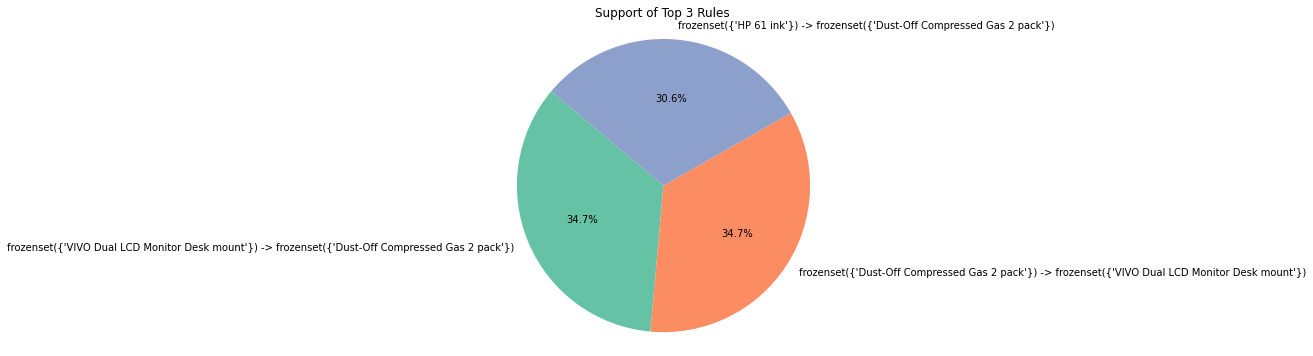

In [34]:
top_items = rul_table.sort_values('support', ascending=False).head(3)

labels = top_items['antecedents'].astype(str) + ' -> ' + top_items['consequents'].astype(str)
sizes = top_items['support']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title("Support of Top 3 Rules")
plt.axis('equal')
plt.show()

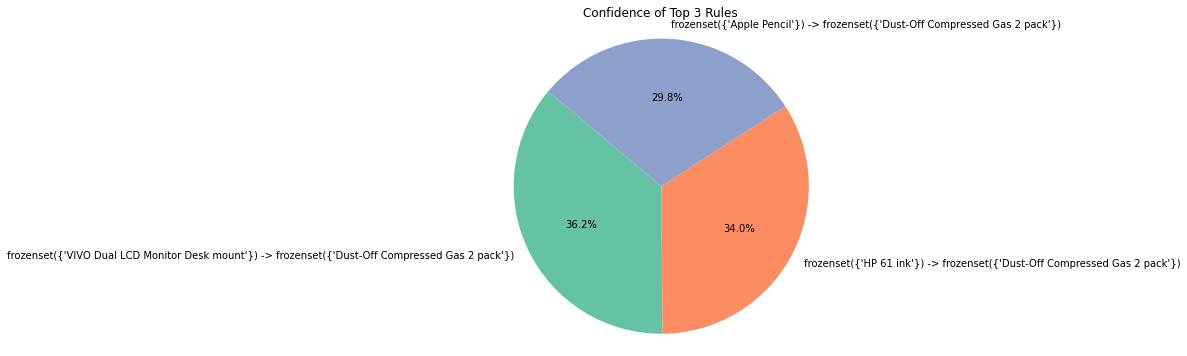

In [35]:
top_confidence_items = rul_table.sort_values('confidence', ascending=False).head(3)


confidence_labels = top_confidence_items['antecedents'].astype(str) + ' -> ' + top_confidence_items['consequents'].astype(str)
confidence_sizes = top_confidence_items['confidence']


plt.figure(figsize=(8, 6))
plt.pie(confidence_sizes, labels=confidence_labels, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title("Confidence of Top 3 Rules")
plt.axis('equal')  
plt.show()
